<a href="https://colab.research.google.com/github/SSUMINIs/Quiz1/blob/master/%EC%9E%91%EC%97%85_3%EC%9C%A0%ED%98%95(scipy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주요 모듈
  ### 6가지 대표 하위 메소드중 통계분석을 위한 stats를 위주로 학습
     * scipy
      01. integrate 수치적분, 미분방정식
      02. linalg 선형대수, 매트릭스 분해
      03. optimize 방정식 해 구하는 알고리즘, 함수 최적화
      04. signal 신호관련
      05. sparse 희소 행렬, 희소 선형 시스템
      06. stats 통계 분석


In [ ]:
# stats 하위 모듈 : 252개-> 293개로 늘었나?
from scipy import stats
print(len([x for x in dir(stats) if x[0] !='_']))

293


# 정규성 검정

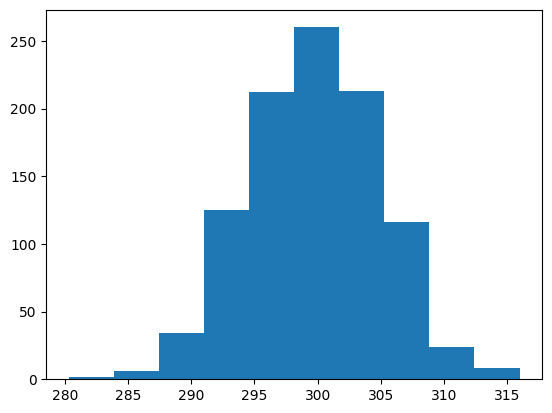

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [ ]:
# 다음 데이터의 정규성을 검증하라
from scipy.stats import shapiro
print(shapiro(df))
# p_value가 0.34이므로 유의수준 5%에서 귀무가설을 기각할 수 없다(=데이터는 정규성을 가진다)

ShapiroResult(statistic=0.9981444478034973, pvalue=0.34849318861961365)


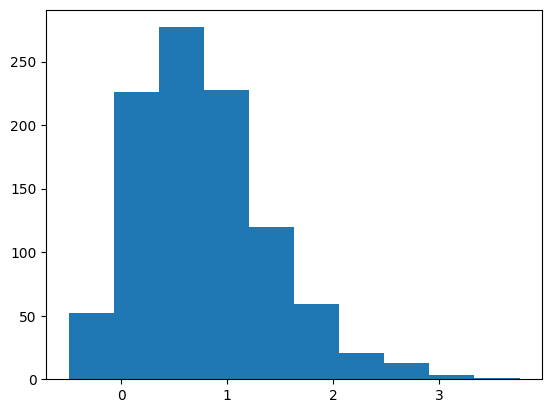

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [ ]:
from scipy.stats import shapiro
print(shapiro(df))

# p-value가 2.3e-16이므로 유의수준 5%에서 귀무가설인" 데이터는 정규성을 가진다"를 기각하고 대립가설을 채택한다
# 데이터는 정규성을 가지지 않는다.

ShapiroResult(statistic=0.9578885436058044, pvalue=2.309641794969743e-16)


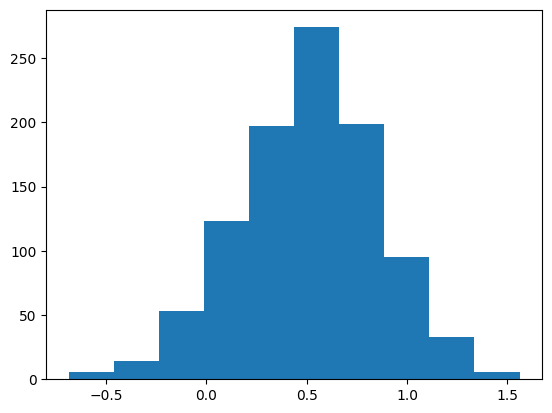

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
log_y_data = np.log1p(df)
plt.hist(log_y_data)
plt.show()

In [ ]:
# 데이터를 log변환 한 후에 정규성을 가지는지 확인하라
from scipy.stats import shapiro
print(shapiro(log_y_data))
# p-value 0.17이므로 유의수준 5%에서 귀무가설("데이터는 정규성을 가진다")을 기각할 수 없

ShapiroResult(statistic=0.9976889491081238, pvalue=0.17540602385997772)


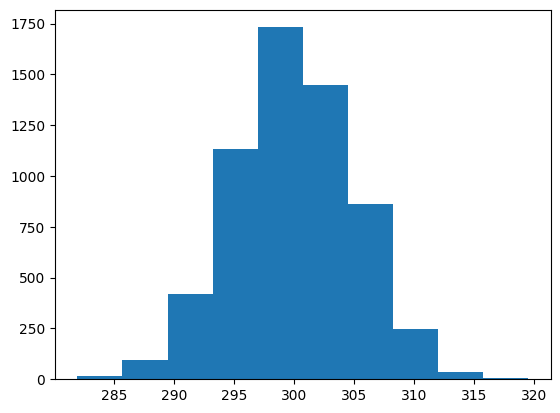

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [ ]:
# 다음 데이터의 정규성을 검증하라
from scipy.stats import shapiro
print(shapiro(df))

# p-value가 0.15이므로 유의수준 5%에서 귀무가설(데이터는 정규성을 가진다)을 기각할 수 없다
# but 경고 메세지에서 5000개 초과의 샘플에 대해서는 샤피로 검정은 정확하지 않을 수 있다

from scipy.stats import anderson
# 데이터가 상대적으로 많을때 anderson 실시
print(anderson(df['data'].values))
# significance_level는 유의 확률값을 나타내며, critical_values는 각 유의 확률값의 기준점이 된다
#significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])
#critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091])
# 유의수준 5%에서 검정을 진행하려면 significance_level 5.에 위치한 인덱스를 critical_values 값에서 비교하면 된다
# 그 값은 0.786.이므로 이보다 큰 0.82를 가지므로 귀무가설을 기각하고 대립가설을 채택한다
# 즉 데이터는 정규성을 가지지 않는다고 판단(p-value와 기각 기준 부등호 개념이 반대)

ShapiroResult(statistic=0.9995355606079102, pvalue=0.1507067084312439)
AndersonResult(statistic=0.8266993530405671, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=299.95980319533163, scale=5.031806887885131)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# 단일 표본 t검정(one-sample)




In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')
df.head(2)

,height
0,160.237691
1,164.747324


In [ ]:
#100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
# 그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import wilcoxon

static, pvalue = shapiro(df)
print('샤피로 정규성 검정 p-value :', pvalue,'이므로')

if pvalue < 0.05:
  print('귀무가설을 기각한다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕슨 순위 부호 검정을 진행한다.\n')
  print('윌콕슨 순위 부호 검정은 귀무가설은 "100명 키의 평균은 165이다."이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다.')
  # 윌콕슨 부호순위 검정
  static, pvalue = wilcoxon(df['height']-165) # or static, pvalue = wilcoxon(df['height'], np.ones(len(df)) *165)

  if pvalue < 0.05:
    print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
  else:
    print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')
else:
  print('귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일 표본 검정으로 확인한다.\n')
  print('단일표본 t-test의 귀무가설은 "100명의 키의 평균은 165이다."이며 대립가설은 "100명의 키의 평균은 165가 아니다."이다.')

  # 단일 표본 t검정
  static, pvalue = ttest_1samp(df['height'], 165)
  if pvalue < 0.05:
    print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
  else:
    print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')

샤피로 정규성 검정 p-value : 0.4558176100254059 이므로
귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일 표본 검정으로 확인한다.

단일표본 t-test의 귀무가설은 "100명의 키의 평균은 165이다."이며 대립가설은 "100명의 키의 평균은 165가 아니다."이다.
검정 결과 pvalue는 0.0018367171548080209로 결과는 귀무가설을 기각하고 대립가설을 채택한다.


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')

In [ ]:
# 100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
# 그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import wilcoxon

# 정규성 검정 샤피로
static, pvalue = shapiro(df)
print('샤피로 정규성 검정 p-value : ',pvalue,'이므로')

if pvalue < 0.05:
    print('귀무가설을 기각한다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕슨 순위 부호 검정을 진행한다.\n')
    print('윌콕슨 순위 부호 검정의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다')

    #윌콕슨 부호순위 검정
    static, pvalue = wilcoxon(df['height']-165) # or static, pvalue = wilcoxon(df['height'], np.ones(len(df)) *165)



    if pvalue < 0.05:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')


else:
    print('귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일표본 검정으로 확인한다.\n')
    print('단일표본 t-test의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다')

    #단일 표본 t 검정
    static, pvalue = ttest_1samp(df['height'],165)
    if pvalue < 0.05:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')

샤피로 정규성 검정 p-value :  0.013552471995353699 이므로
귀무가설을 기각한다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕슨 순위 부호 검정을 진행한다.

윌콕슨 순위 부호 검정의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다
검정 결과 pvalue는 0.04880534424649582로 결과는 귀무가설을 기각하고 대립가설을 채택한다.


# 등분산 검정

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [ ]:
# 두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene
a = df[df['class']=='A'].score
b = df[df['class']=='B'].score

print(bartlett(a,b))
print(fligner(a,b,center='median')) # default
print(fligner(a,b,center='mean'))

print(levene(a,b,center='median')) # default
print(levene(a,b,center='mean'))

# 등분산 검정의 방법은 3가지가 있음. pvalue값은 5% 유의수준이라면 0.05보다 작은 경우 "각 그룹은 등분산이다" 라는 귀무가설을 기각한다.
# 결과를 보면 모두 0.05보다 크므로 귀무가설을 기각할 수 없음을 알 수 있다.

BartlettResult(statistic=0.26035880448930865, pvalue=0.609873758447687)
FlignerResult(statistic=0.7281251154135562, pvalue=0.39349158741002765)
FlignerResult(statistic=0.8272211734319945, pvalue=0.36307728836821906)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)
LeveneResult(statistic=0.5086970687685527, pvalue=0.4760514837800255)


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy3.csv')
df.head()

,class,score
0,A,32
1,A,69
2,A,68
3,A,60
4,A,78


In [ ]:
# 두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

a = df[df['class']=='A'].score
b = df[df['class']=='B'].score

print(bartlett(a,b))
print(fligner(a,b,center='median')) # default
print(fligner(a,b,center='mean'))

print(levene(a,b,center='median')) # default
print(levene(a,b,center='mean'))
# bartlett 검정 결과 0.05보다 크고, 나머지 검정은 0.05보다 작다
# fligner, levene는 bartlett보다 좀더 robust하다는 특징이 있다. (건장한, 극단값들에 예민, 민감하지 않다. 이상값에 영향을 적게 받는다.)
# 어떤 검정의 결과를 사용해야 하는지는 정해지지 않았지만 상황에 따라 특징들을 서술할 수 있다면 문제 없을 듯...

BartlettResult(statistic=1.5116783794562305, pvalue=0.2188831590902503)
FlignerResult(statistic=4.960366756026232, pvalue=0.025934706256615564)
FlignerResult(statistic=4.94724457924667, pvalue=0.026132286002684912)
LeveneResult(statistic=4.307122424591436, pvalue=0.03848734007752694)
LeveneResult(statistic=4.342327020297874, pvalue=0.0377066528874248)


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')
df.head()

,A,B
0,44,36
1,61,92
2,76,41
3,64,45
4,65,35


In [ ]:
# 두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene


print(bartlett(df.A,df.B))
print(fligner(df.A,df.B))
print(levene(df.A,df.B))

# BartlettResult -> 등분산이다  // FlignerResult , LeveneResult -> 등분산이 아니다

BartlettResult(statistic=2.3832178811043527, pvalue=0.12264468401745829)
FlignerResult(statistic=5.124831619122788, pvalue=0.023585858890699054)
LeveneResult(statistic=5.147914610463281, pvalue=0.023868975493455683)


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.head()

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0


In [ ]:
# 두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene


print(bartlett(df.A,df.B))
print(bartlett(df.A,df.B.dropna()))
print()

print(fligner(df.A,df.B))
print(fligner(df.A,df.B.dropna()))
print()

print(levene(df.A,df.B))
print(levene(df.A,df.B.dropna()))

#?? bartlett ,fligner 두 검정은 nan값을 지우고 사용해야한다. LeveneResult의 경우 nan값이 포함된다면 연산이 제대로 안된다

BartlettResult(statistic=4.119254834772108, pvalue=0.04239774936707851)
BartlettResult(statistic=3.024072692680794, pvalue=0.08203720607748438)

FlignerResult(statistic=nan, pvalue=nan)
FlignerResult(statistic=7.710320541528441, pvalue=0.005490600130793619)

LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=8.008595918808284, pvalue=0.004851565077063284)


# 독립표본 검정(Independent)
  * 독립 표본 t검정의 경우 집단의 정규성에 따라 접근성이 다르다.[정규성 검정은 shapiro, anderson(샘플 5000개 이상)을 통해 확인]
  ## 데이터가 정규성을 가지는 경우(모수적 검정)
    * 두 집단의 등분산 검정을 한 후
    * from scipy.stats import ttest_ind
      * 등분산일 경우 : equal_var=True
      * 등분산이 아닐 경우 : equal_var=False, welch t-test
  ## 데이터가 정규성을 가지지 않는 경우(비모수적 검정)

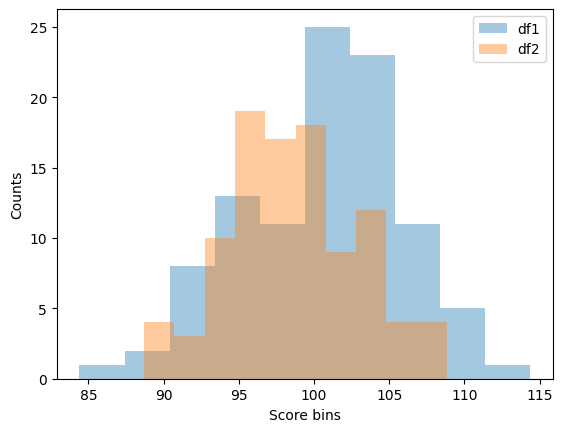

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')


plt.hist(df1,label='df1',alpha=0.4)
plt.hist(df2,label="df2",alpha=0.4)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [ ]:
# 두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라
from scipy.stats import shapiro
print(shapiro(df1))
print(shapiro(df2))

# 두 그룹 모두 귀무가설(정규성을 가진다)을 기각하지 못한다. 정규성을 가진다.

from scipy.stats import levene
print(levene(df1['data'],df2['data']))
# 귀무가설을 기각하지 못한다. 등분산을 가진다

from scipy.stats import ttest_ind
print(ttest_ind(df1,df2,equal_var=True))
# 등분산이기 때문에 equal_var=True 파라미터를 주고 ttest_ind모듈을 이용하여 t test 진행
# 0.006.이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하고 대립가설을 채택한다.

ShapiroResult(statistic=0.9860946536064148, pvalue=0.379673033952713)
ShapiroResult(statistic=0.990182638168335, pvalue=0.6793646216392517)
LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469093)
TtestResult(statistic=array([2.76719074]), pvalue=array([0.00619015]), df=array([198.]))


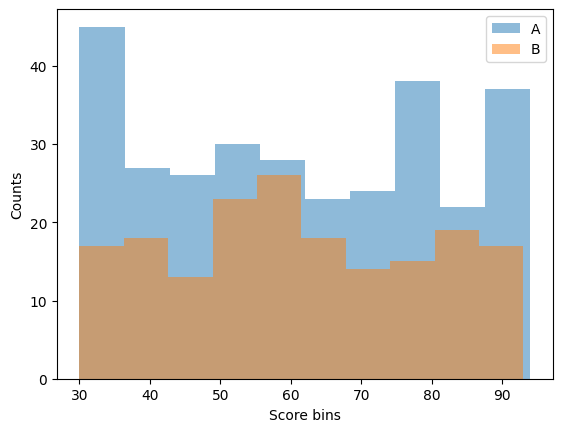

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')

plt.hist(df['A'],alpha=0.5,label='A')
plt.hist(df['B'].dropna(),alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()
# 데이터 분포를 확인해보니 정규성을 위해하는 것 처럼 보인다.
# 두 그룹 중 한 그룹만 정규성을 위배해도 독립표본 t-검정을 할 수 없다.

In [ ]:
# 두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라
print(shapiro(df['B'].dropna()))
print(shapiro(df['A']))
# 귀무가설(정규성을 가진다)을 기각한다. 정규성을 위배한다. 그러므로 비모수검정을 실시해야 한다.

from scipy.stats import mannwhitneyu, ranksums
print()
print(mannwhitneyu(df['A'],df['B'].dropna()))
print(ranksums(df['A'],df['B'].dropna()))
# Mann-Whitney U Test 검정 결과 pvalue는 0.49값으로 귀무가설(평균은같다)를 기각 할 수 없다. 두그룹의 평균은 동일하다 말할 수 있다.
# 윌콕슨 순위합 검정(ranksums)으로 확인 해봐도 같은 결과가 나온다.

ShapiroResult(statistic=0.9639433026313782, pvalue=0.00013568344002123922)
ShapiroResult(statistic=0.93753981590271, pvalue=6.175894240456614e-10)

MannwhitneyuResult(statistic=27036.0, pvalue=0.9807458376150018)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)


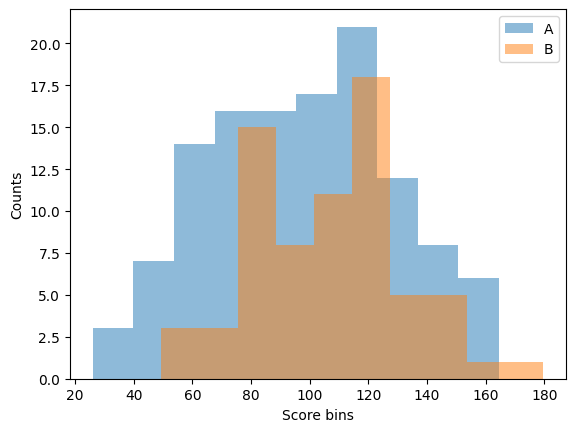

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')

plt.hist(df[df['group'] =='a'].data,label='A',alpha=0.5)
plt.hist(df[df['group'] =='b'].data,label="B",alpha=0.5)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [ ]:
# 두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라
a = df[df['group']=='a'].data
b = df[df['group']=='b'].data

from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))
# 귀무가설(정규성을 가진다)를 기각하지 못한다. 정규성을 가진다.

from scipy.stats import levene
print()
print(levene(a,b))
# 귀무가설 기각하고 대립가설을 채택한다. 두 그룹은 등분산이 아니다.

from scipy.stats import ttest_ind
print()
print(ttest_ind(a,b,equal_var=False))
# 등분산이 아니기 때문에 equal_var=False 파라미터를 주고 ttest_ind 모듈을 이용하여 t test를 진행한다
# pvalue는 0.02이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하고 대립가설을 채택한다
# 결론적으로 두 그룹은 모두 정규성을 가지지만 등분산은 아니며 평균은 동일하다고 보기 어렵다

ShapiroResult(statistic=0.9834123253822327, pvalue=0.1473984718322754)
ShapiroResult(statistic=0.9831852316856384, pvalue=0.4701973497867584)

LeveneResult(statistic=6.185601018015722, pvalue=0.013750484571911342)

TtestResult(statistic=-2.1949470315829265, pvalue=0.029512802991767898, df=171.25282465005142)


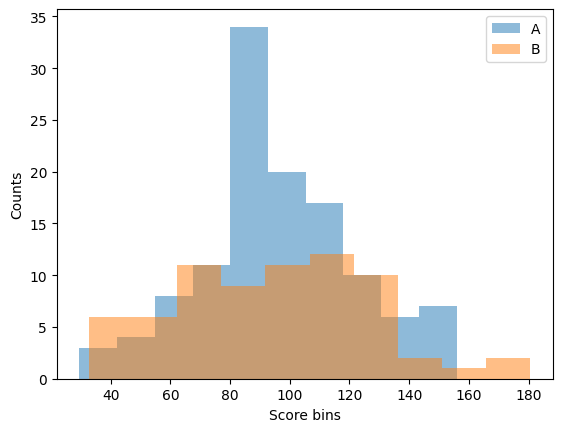

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')

plt.hist(df['a'],alpha=0.5,label='A')
plt.hist(df['b'],alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [ ]:
# 두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라
a = df['a'].dropna()
b = df['b'].dropna()

from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))
# 귀무가설(정규성을 가진다)을 기각하지 못한다. 두 그룹은 정규성을 가진다.

from scipy.stats import levene
print()
print(levene(a,b))
# 귀무가설을 기각하고 대립가설을 채택한다. 두 그룹은 등분산이 아니다.

from scipy.stats import ttest_ind
print()
print(ttest_ind(a,b,equal_var=False))
# 등분산이 아니기 때문에 equal_var=False 파라미터를 주고 ttest_ind 모듈을 이용하여 t test를 진행한다
# pvalue는 0.99이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하기 어렵다
# 결론적으로 두 그룹은 모두 정규성을 가지지만 등분산은 아니며 평균은 동일하다고 볼 수 있다

ShapiroResult(statistic=0.9865895509719849, pvalue=0.28390026092529297)
ShapiroResult(statistic=0.9854326844215393, pvalue=0.5937624573707581)

LeveneResult(statistic=3.9862856894158347, pvalue=0.04731495612868527)

TtestResult(statistic=0.0015963310698567184, pvalue=0.9987289046092704, df=122.72255248639058)


# 대응표본 t검정(paired)

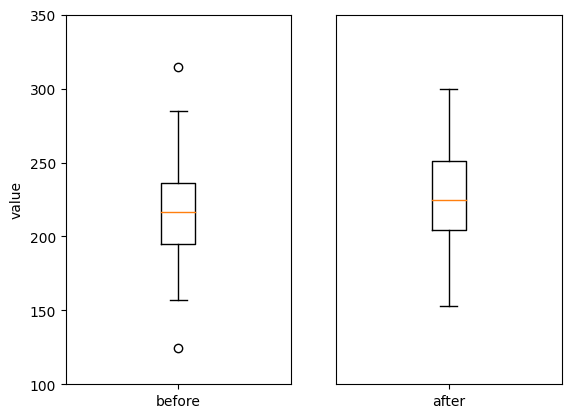

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(100,350)
ax[1].set_ylim(100,350)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [ ]:
# 특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라
from scipy.stats import shapiro
before = df['before']
after = df['after']
print(shapiro(before))
print(shapiro(after))
# 정규성을 가진다

from scipy.stats import levene
print()
print(levene(before,after))
# 등분산을 가진다

from scipy.stats import ttest_rel
print()
print(ttest_rel(before,after))
# 정규성 가짐 , 등분산성 가짐 -> 대응표본의 경우 등분산성이 파라미터에 영향을 주지않음,
#  귀무가설을 기각한다 (전 후 평균은 같지 않다)

ShapiroResult(statistic=0.9907895922660828, pvalue=0.6065835952758789)
ShapiroResult(statistic=0.9916961193084717, pvalue=0.6923638582229614)

LeveneResult(statistic=0.06427968690211128, pvalue=0.8000741651677987)

TtestResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513, df=119)


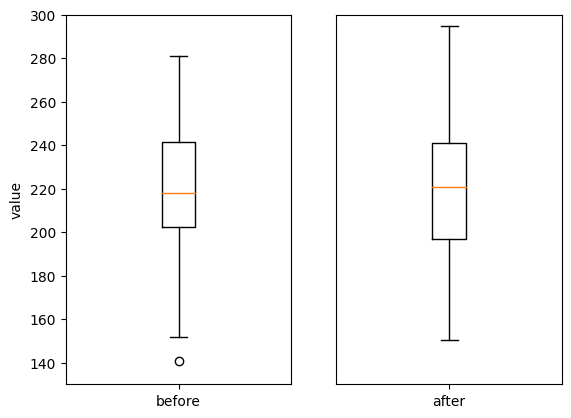

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(130,300)
ax[1].set_ylim(130,300)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [ ]:
# 특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라
from scipy.stats import shapiro
before = df['before']
after = df['after']
print(shapiro(before))
print(shapiro(after))
# 정규성을 가진다

from scipy.stats import levene
print()
print(levene(before,after))
# 등분산을 가진다

from scipy.stats import ttest_rel
print(ttest_rel(before,after))
# 귀무가설을 기각할 수 없다 (전 후 평균은 같다)

ShapiroResult(statistic=0.9920631051063538, pvalue=0.7270199656486511)
ShapiroResult(statistic=0.992019534111023, pvalue=0.7229290008544922)

LeveneResult(statistic=1.3463330638203617, pvalue=0.24708279045237214)
TtestResult(statistic=0.188900575991026, pvalue=0.8504925317234707, df=119)


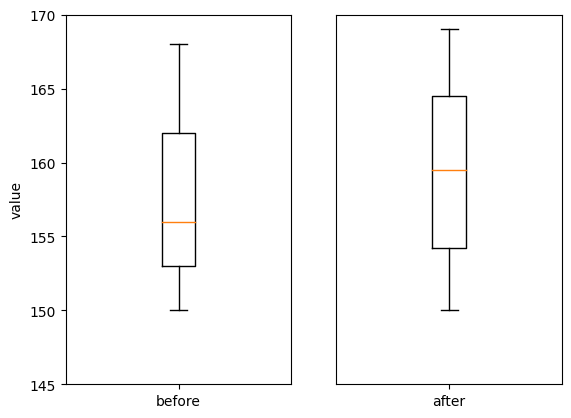

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(145,170)
ax[1].set_ylim(145,170)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [ ]:
# 특정 집단의 학습 전후 시험 성적 변화를 나타낸 데이터이다. 시험 전과 후에 차이가 있는지 검정하라

from scipy.stats import shapiro
before = df['before']
after = df['after']
print(shapiro(before))
print(shapiro(after))
# 정규성을 가지지 않는다.

from scipy.stats import levene
print()
print(levene(before,after))
# 등분산을 가진다

from scipy.stats import ttest_rel
print()
print(ttest_rel(before,after))
print()
# t-test로 보면 귀무가설 기각 but 정규성을 가지지 않으므로 윌콕슨 부호순위 검정 진행

from scipy.stats import wilcoxon
print(wilcoxon(before,after))
# 귀무가설을 기각할 수 없다

# 정규성을 가지지 않음 , 등분산성 가짐 -> 대응표본의 경우 등분산성이 파라미터에 영향을 주지않음,
# 정규성을 가지지 않으므로 대응 표본 검정중 비모수 검정인 윌콕슨 부호순위 검정을 진행해야한다 (scipy.stats.wilcoxon)

ShapiroResult(statistic=0.9173730611801147, pvalue=0.0018974003614857793)
ShapiroResult(statistic=0.9448966979980469, pvalue=0.021140215918421745)

LeveneResult(statistic=0.14329522146179022, pvalue=0.7058456563194881)

TtestResult(statistic=-2.187138399865287, pvalue=0.03353471744538162, df=49)

WilcoxonResult(statistic=437.0, pvalue=0.12098409484052809)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


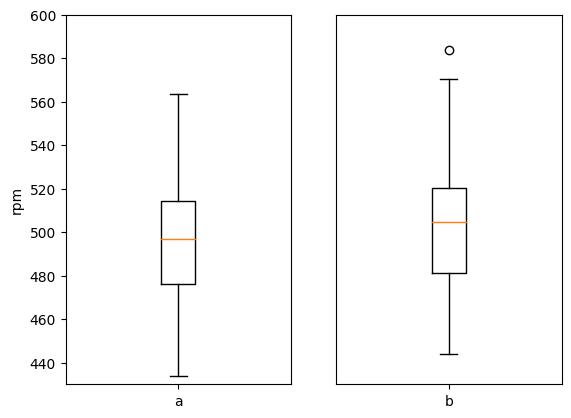

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel4.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df[df['group']=='a'].rpm)
ax[1].boxplot(df[df['group']=='b'].rpm)
ax[0].set_xticklabels(['a'])
ax[1].set_xticklabels(['b'])
ax[0].set_ylim(430,600)
ax[1].set_ylim(430,600)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('rpm')
plt.show()

In [ ]:
# 한 기계 부품의 rpm 수치를 두가지 다른 상황에서 측정했다.(총 70세트) b 상황이 a 상황보다 rpm값이 높다고 말할 수 있는지 검정하라
from scipy.stats import shapiro
a = df[df['group']=='a'].rpm
b =  df[df['group']=='b'].rpm
print(shapiro(a))
print(shapiro(b))
# 정규성을 가진다

from scipy.stats import levene
print()
print(levene(a,b))
# 등분산을 가진다

from scipy.stats import ttest_rel
print()
print(ttest_rel(a,b,alternative='greater'))
# a,b,alternative='greater' 의 의미는 a >b가 대립가설이 된다는 것이다. p-value는 0.96으로
# 귀무가설인 a<=b를 기각하지 못한다. 그러므로 b상황이 a 상황보다 rpm 값이 크다고 이야기 할수 있다.

ShapiroResult(statistic=0.9907217025756836, pvalue=0.8884284496307373)
ShapiroResult(statistic=0.984674870967865, pvalue=0.5505106449127197)

LeveneResult(statistic=0.06716114122680159, pvalue=0.7959020864923277)

TtestResult(statistic=-1.9018108294460812, pvalue=0.9693143365355352, df=69)


# 카이제곱 검정(교차분석)
  ## 일원 카이제곱검정(chisquare, 카이제곱 적합도 검정)
    * 한 개의 요인에 의해 k개의 범주를 가질때 이론적 분포를 따르는지 검정
  ## 이원 카이제곱검정(chi2_contingency,fisher_exact(빈도수 5개 이하 셀이 20% 이상일때), 카이제곱독립검정)
    * 모집단이 두개의 변수에 의해 범주화되었을때, 두 변수들 사이의 관계가 독립인지 아닌지 검정

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')

plt.bar(df.dice_number,df.counts)
plt.xlabel('dice value')
plt.ylabel('counts')
plt.show()

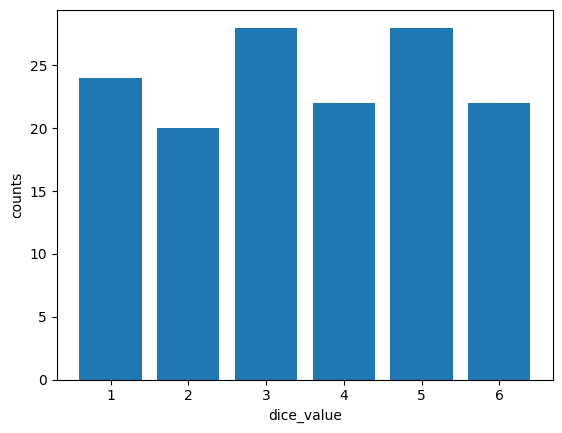

In [ ]:
# 144회 주사위를 던졌을때, 각 눈금별로 나온 횟수를 나타낸다. 이 데이터는 주사위의 분포에서 나올 가능성이 있는지 검정하라
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')

plt.bar(df.dice_number,df.counts)
plt.xlabel('dice_value')
plt.ylabel('counts')
plt.show()

In [ ]:
# 주사위 눈금의 발생확률은 1/6으로 모두 동일하다. 그러므로 각 눈금의 기댓값은 실제 발생한 모든값을 6으로 나눈 값이다.

from scipy.stats import chisquare
df['expected'] = (df['counts'].sum()/6).astype('int')
print(chisquare(df.counts, df.expected))

# p-value는 0.8로 귀무가설인 "각 주사위 눈금 발생비율은 동일함"을 기각 할 수 없다

Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)


In [ ]:
# 다음 데이터는 어떤 집단의 왼손잡이, 오른손 잡이의 숫자를 나타낸다. 인간의 왼손잡이와 오른손잡이의 비율을 0.2:0.8로 알려져있다.
# 이 집단에서 왼손과 오른손 잡이의 비율이 적합한지 검정하라
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')
df.head()

,hands
0,right
1,right
2,left
3,right
4,right


In [ ]:
target = df.hands.value_counts().to_frame()
target['expected'] = [int(target.count.sum()*0.8),int(target.count.sum()*0.2)]
display(target)
from scipy.stats import chisquare
print(chisquare(target.hands,target.expected))

# 알려진 비율로 계산된 기댓값을 구하여 카이제곱검정을 시행한다.
# p-value는 0.02로 유의수준 5%이내에서 귀무가설을 기각하고 대립가설을 채택한다
# 즉 주어진 집단의 왼손, 오른손 비율은 0.2, 0.8으로 볼 수 없다

AttributeError: 'function' object has no attribute 'sum'

In [ ]:
# 다음 데이터는 국민 기초체력을 조사한 데이터이다. 성별과 등급이 독립적인지 검정하라
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


In [ ]:
cdf = pd.crosstab(df['측정회원성별'],df['등급'])
display(cdf)

from scipy.stats import chi2_contingency
print(chi2_contingency(cdf))
chi2 , p ,dof, expected = chi2_contingency(cdf)
print(p)

# p-value는 0에 근접하므로 측정회원성별 - 등급은 연관이 없다는 귀무가설을 기각하고, 성별관 체력 등급간에는 관련이 있다고 볼 수 있다.

등급,A,B,C,D
측정회원성별,,,,
F,1484,1130,1147,1120
M,1865,2219,2202,2229


Chi2ContingencyResult(statistic=120.06233631119409, pvalue=7.481892813401677e-26, dof=3, expected_freq=array([[1220.25, 1220.25, 1220.25, 1220.25],
       [2128.75, 2128.75, 2128.75, 2128.75]]))
7.481892813401677e-26


In [ ]:
# 성별에 따른 동아리 활동 참석 비율을 나타낸 데이터이다. 성별과 참석간에 관련이 있는지 검정하라
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)
df

,불참,참석,총합
남성,4,2,6
여성,1,9,10
총합,5,11,16


In [ ]:
cdf = df.iloc[:-1,:-1]
display(cdf)

from scipy.stats import chi2_contingency,fisher_exact
print(chi2_contingency(cdf))
chi2 , p ,dof, expected = chi2_contingency(cdf)
print(p)

# 카이 제곱 검정시 p-value는 0.07로 귀무가설을 기각하지 못한다. 성별과 참석여부는 관련이 없다(독립이다).

# 하지만 5보다 작은 셀이 20%가 넘어가므로(75%) 피셔의 정확검정을 사용 해야한다.
# 피셔의 정확검정시 0.03의 값을 가지므로 귀무가설을 기각한다. 성별과 참석여부는 관련이 있다. (독립이 아니다))
print(fisher_exact(cdf))

,불참,참석
남성,4,2
여성,1,9


Chi2ContingencyResult(statistic=3.277575757575758, pvalue=0.07023259819117404, dof=1, expected_freq=array([[1.875, 4.125],
       [3.125, 6.875]]))
0.07023259819117404
SignificanceResult(statistic=18.0, pvalue=0.03571428571428571)
